In [23]:
import pandas as pd
import matplotlib.pyplot as plt

import torch
import numpy as np

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [12]:
# CSV 파일에 접근
maml_info = pd.read_csv('../MAML_filter128/MAML_filter128_inner_loop.csv')
arbiter_info = pd.read_csv('../MAML+Arbiter_5way_5shot_7173/MAML+Arbiter_5way_5shot_inner_loop.csv')

# 훈련 정보만 가지고 온다
maml_info_train = maml_info[maml_info['phase']=='val']
arbiter_info_train= arbiter_info[arbiter_info['phase']=='val']

C:\Users\JM\anaconda3\envs\maml\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# 1. 정보를 Domain 별로 압축

In [31]:
maml_info_mini_imagenet = maml_info_train[maml_info_train['current_iter']=='mini_imagenet_full_size']
maml_info_mini_imagenet = maml_info_mini_imagenet.groupby('num_step')

In [15]:
# mini-imagenet
arbiter_info_mini_imagenet = arbiter_info[arbiter_info['current_iter']=='mini_imagenet_full_size']
arbiter_info_mini_imagenet = arbiter_info_mini_imagenet.groupby('num_step')
# tiered-imagenet
arbiter_info_tiered_imagenet = arbiter_info[arbiter_info['current_iter']=='tiered_imagenet']
arbiter_info_tiered_imagenet = arbiter_info_tiered_imagenet.groupby('num_step')
# CIFAR_FS
arbiter_info_CIFAR_FS = arbiter_info[arbiter_info['current_iter']=='CIFAR_FS']
arbiter_info_CIFAR_FS = arbiter_info_CIFAR_FS.groupby('num_step')
# CUB
arbiter_info_CUB = arbiter_info[arbiter_info['current_iter']=='CUB']
arbiter_info_CUB = arbiter_info_CUB.groupby('num_step')

Text(0.5, 1.0, 'Gradient norm')

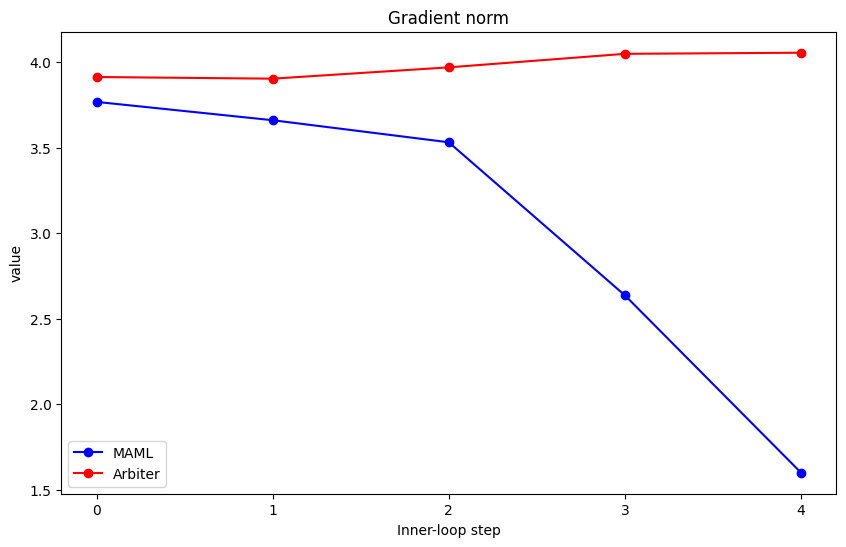

In [24]:
group_names = []

for name, group in maml_info_mini_imagenet:
    # 그룹 이름을 저장 (모든 그룹은 동일한 순서로 추가됨)
    if name not in group_names:
        group_names.append(name)

x = range(len(group_names))
        
maml_mean_df = maml_info_mini_imagenet['all_grads_l2norm'].mean()
arbiter_mean_df = arbiter_info_mini_imagenet['all_grads_l2norm'].mean()

maml_means = maml_mean_df.values
arbiter_means = arbiter_mean_df.values

# 데이터에 로그 변환 적용
maml_means = np.log(maml_means)
arbiter_means = np.log(arbiter_means)
# arbiter_withoutWN_means = np.log(arbiter_withoutWN_means)

# 꺾은선 그래프를 그립니다
plt.figure(figsize=(10, 6))
plt.plot(x, maml_means, '-o', color='b', label='MAML')
plt.plot(x, arbiter_means, '-o', color='r', label='Arbiter')
# plt.plot(x, arbiter_withoutWN_means, '-o', color='g', label='Arbiter_withoutWN')
# plt.plot(x, arbiter_withoutGN_means, '-o', color='violet', label='Arbiter_withoutGN')

plt.legend()
plt.xticks(x, group_names)
plt.xlabel('Inner-loop step')
plt.ylabel('value')
plt.title('Gradient norm')

Text(0.5, 1.0, 'gsnr')

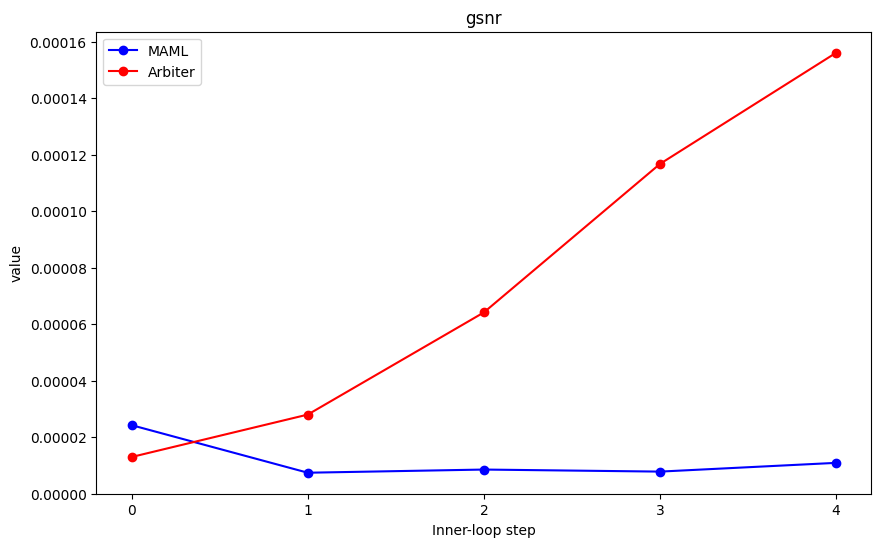

In [25]:
group_names = []

for name, group in maml_info_mini_imagenet:
    # 그룹 이름을 저장 (모든 그룹은 동일한 순서로 추가됨)
    if name not in group_names:
        group_names.append(name)

x = range(len(group_names))
        
maml_mean_df = maml_info_mini_imagenet['gsnr'].mean()
arbiter_mean_df = arbiter_info_mini_imagenet['gsnr'].mean()

maml_means = maml_mean_df.values
arbiter_means = arbiter_mean_df.values

# 데이터에 로그 변환 적용
# maml_means = np.log(maml_means)
# arbiter_means = np.log(arbiter_means)
# arbiter_withoutWN_means = np.log(arbiter_withoutWN_means)

# 꺾은선 그래프를 그립니다
plt.figure(figsize=(10, 6))
plt.plot(x, maml_means, '-o', color='b', label='MAML')
plt.plot(x, arbiter_means, '-o', color='r', label='Arbiter')
# plt.plot(x, arbiter_withoutWN_means, '-o', color='g', label='Arbiter_withoutWN')
# plt.plot(x, arbiter_withoutGN_means, '-o', color='violet', label='Arbiter_withoutGN')

plt.legend()
plt.xticks(x, group_names)
plt.xlabel('Inner-loop step')
plt.ylabel('value')
plt.title('gsnr')

Text(0.5, 1.0, 'Gradient Varaince')

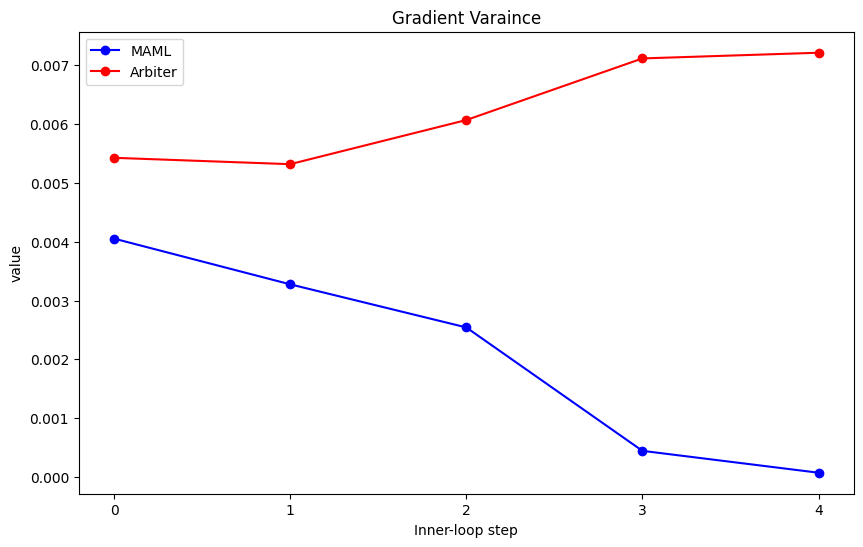

In [33]:
group_names = []

for name, group in maml_info_mini_imagenet:
    # 그룹 이름을 저장 (모든 그룹은 동일한 순서로 추가됨)
    if name not in group_names:
        group_names.append(name)

x = range(len(group_names))
        
maml_mean_df = maml_info_mini_imagenet['all_grads_var'].mean()
arbiter_mean_df = arbiter_info_mini_imagenet['all_grads_var'].mean()

maml_means = maml_mean_df.values
arbiter_means = arbiter_mean_df.values

# 데이터에 로그 변환 적용
# maml_means = np.log(maml_means)
# arbiter_means = np.log(arbiter_means)
# arbiter_withoutWN_means = np.log(arbiter_withoutWN_means)

# 꺾은선 그래프를 그립니다
plt.figure(figsize=(10, 6))
plt.plot(x, maml_means, '-o', color='b', label='MAML')
plt.plot(x, arbiter_means, '-o', color='r', label='Arbiter')
# plt.plot(x, arbiter_withoutWN_means, '-o', color='g', label='Arbiter_withoutWN')
# plt.plot(x, arbiter_withoutGN_means, '-o', color='violet', label='Arbiter_withoutGN')

plt.legend()
plt.xticks(x, group_names)
plt.xlabel('Inner-loop step')
plt.ylabel('value')
plt.title('Gradient Varaince')

Text(0.5, 1.0, 'Gradient mean')

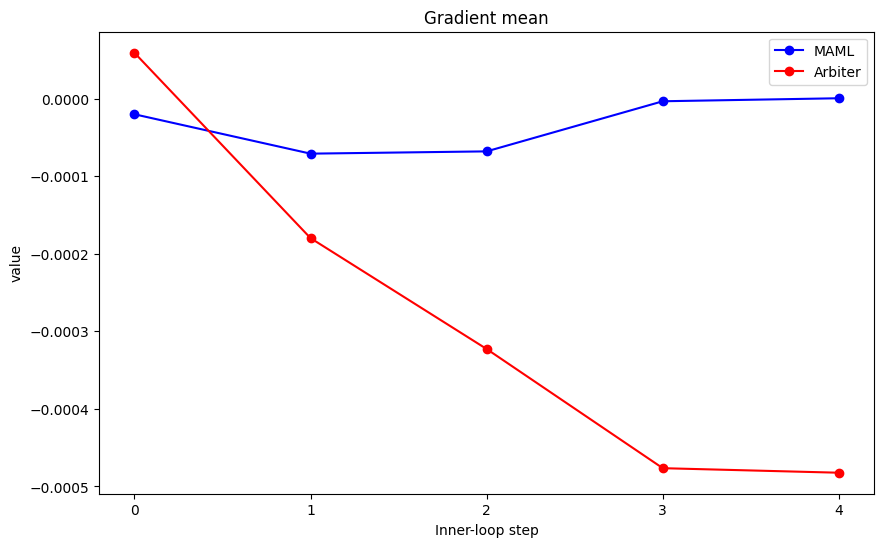

In [28]:
group_names = []

for name, group in maml_info_mini_imagenet:
    # 그룹 이름을 저장 (모든 그룹은 동일한 순서로 추가됨)
    if name not in group_names:
        group_names.append(name)

x = range(len(group_names))
        
maml_mean_df = maml_info_mini_imagenet['all_grads_mean'].mean()
arbiter_mean_df = arbiter_info_mini_imagenet['all_grads_mean'].mean()

maml_means = maml_mean_df.values
arbiter_means = arbiter_mean_df.values

# 데이터에 로그 변환 적용
# maml_means = np.log(maml_means)
# arbiter_means = np.log(arbiter_means)
# arbiter_withoutWN_means = np.log(arbiter_withoutWN_means)

# 꺾은선 그래프를 그립니다
plt.figure(figsize=(10, 6))
plt.plot(x, maml_means, '-o', color='b', label='MAML')
plt.plot(x, arbiter_means, '-o', color='r', label='Arbiter')
# plt.plot(x, arbiter_withoutWN_means, '-o', color='g', label='Arbiter_withoutWN')
# plt.plot(x, arbiter_withoutGN_means, '-o', color='violet', label='Arbiter_withoutGN')

plt.legend()
plt.xticks(x, group_names)
plt.xlabel('Inner-loop step')
plt.ylabel('value')
plt.title('Gradient mean')

Text(0.5, 1.0, 'Weight norm')

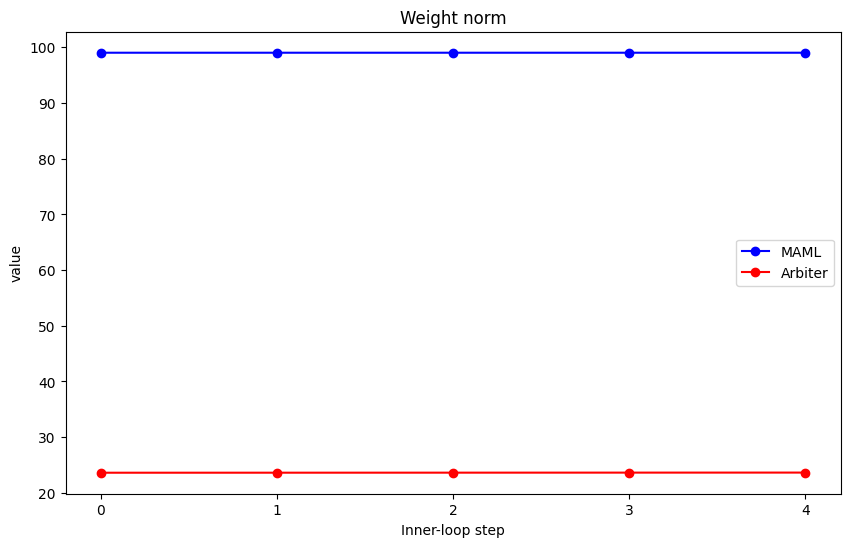

In [45]:
group_names = []

for name, group in maml_info_mini_imagenet:
    # 그룹 이름을 저장 (모든 그룹은 동일한 순서로 추가됨)
    if name not in group_names:
        group_names.append(name)

x = range(len(group_names))
        
maml_mean_df = maml_info_mini_imagenet['all_weights_norm'].mean()
arbiter_mean_df = arbiter_info_mini_imagenet['all_weights_norm'].mean()

maml_means = maml_mean_df.values
arbiter_means = arbiter_mean_df.values

# 데이터에 로그 변환 적용
# maml_means = np.log(maml_means)
# arbiter_means = np.log(arbiter_means)

# 꺾은선 그래프를 그립니다
plt.figure(figsize=(10, 6))
plt.plot(x, maml_means, '-o', color='b', label='MAML')
plt.plot(x, arbiter_means, '-o', color='r', label='Arbiter')
# plt.plot(x, arbiter_withoutWN_means, '-o', color='g', label='Arbiter_withoutWN')
# plt.plot(x, arbiter_withoutGN_means, '-o', color='violet', label='Arbiter_withoutGN')

plt.legend()
plt.xticks(x, group_names)
plt.xlabel('Inner-loop step')
plt.ylabel('value')
plt.title('Weight norm')

Text(0.5, 1.0, 'Weight variance')

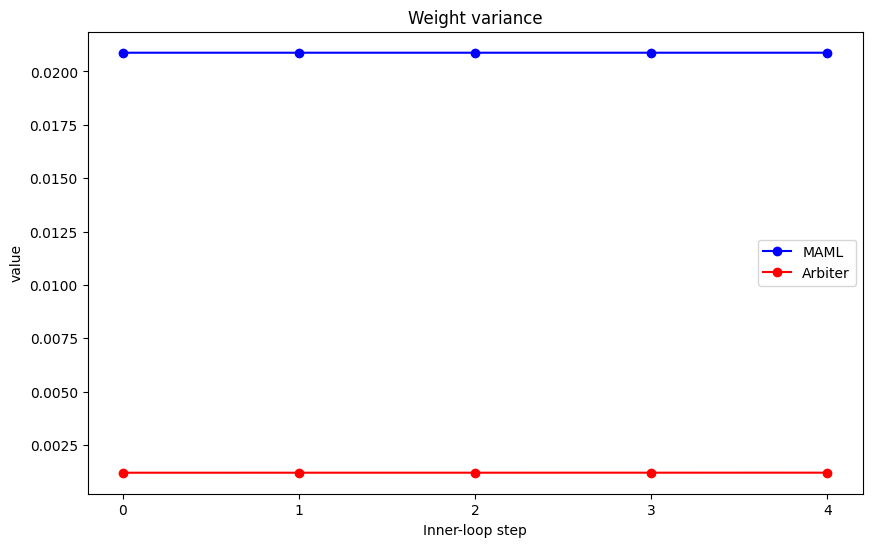

In [43]:
group_names = []

for name, group in maml_info_mini_imagenet:
    # 그룹 이름을 저장 (모든 그룹은 동일한 순서로 추가됨)
    if name not in group_names:
        group_names.append(name)

x = range(len(group_names))
        
maml_mean_df = maml_info_mini_imagenet['all_weights_var'].mean()
arbiter_mean_df = arbiter_info_mini_imagenet['all_weights_var'].mean()

maml_means = maml_mean_df.values
arbiter_means = arbiter_mean_df.values

# 데이터에 로그 변환 적용
# maml_means = np.log(maml_means)
# arbiter_means = np.log(arbiter_means)

# 꺾은선 그래프를 그립니다
plt.figure(figsize=(10, 6))
plt.plot(x, maml_means, '-o', color='b', label='MAML')
plt.plot(x, arbiter_means, '-o', color='r', label='Arbiter')
# plt.plot(x, arbiter_withoutWN_means, '-o', color='g', label='Arbiter_withoutWN')
# plt.plot(x, arbiter_withoutGN_means, '-o', color='violet', label='Arbiter_withoutGN')

plt.legend()
plt.xticks(x, group_names)
plt.xlabel('Inner-loop step')
plt.ylabel('value')
plt.title('Weight variance')